<a href="https://colab.research.google.com/github/jupiterthought/my-reposito/blob/main/Devika%20Thilakan%20.Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/car_age_price.csv')

In [ ]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [ ]:
data.isna().sum()

,0
Year,0
Price,0


In [ ]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

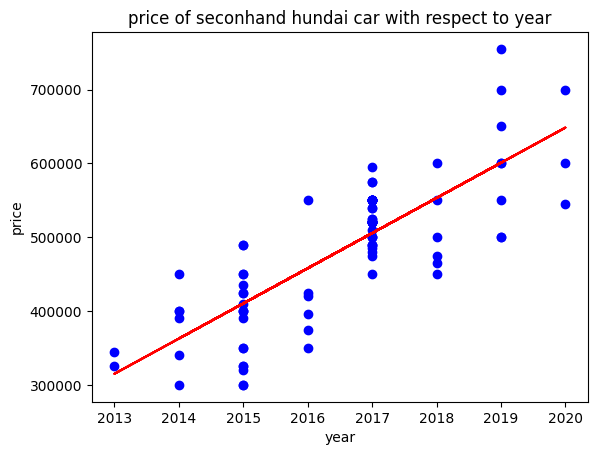

In [ ]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')
plt.title('price of seconhand hundai car with respect to year')
plt.xlabel('year')
plt.ylabel('price')
plt.show

In [ ]:
predictions=model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("mean squared error=",mean_squared_error(y_test,predictions))
print ("R squared value=",r2_score(y_test,predictions))

mean squared error= 4326906256.829671
R squared value= 0.36759313425902185


In [ ]:
value=model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
value

array([743601.61594504])

In [ ]:
#lasso regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+11, tolerance: 7.352e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e+11, tolerance: 7.900e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+11, tolerance: 7.688e

{'alpha': 1e-08}
-3564922131.72581


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
prediction_lasso=lasso_regressor.predict(x_test)



<ipython-input-22-e1265dd29a42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

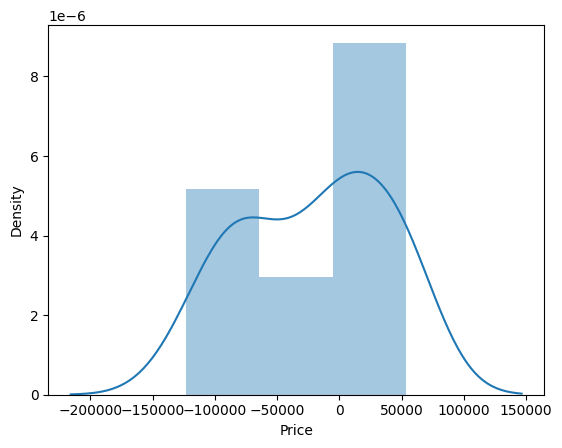

In [ ]:
sns.distplot(y_test-prediction_lasso)